The goal here is to make visualizations to see how many OYs are counted in different PUMAs within King county and specifically South King county. 

Also visualize the OY breakdown between different age groups within the region and the school credentials relating to each age groups of OY

In [15]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [16]:
import psycopg2
import pandas as pd

In [17]:
DBNAME = "opportunity_youth"

In [18]:
conn = psycopg2.connect(dbname=DBNAME)

In [19]:
oy_count_with_esr_wkl_south = pd.read_sql("""SELECT SUM(pwgtp) AS oy_count, n.puma_name, p.puma
                                           FROM pums_2017 p
                                           JOIN puma_names_2010 n
                                           ON p.puma = n.puma
                                           WHERE p.puma BETWEEN '11610' AND '11615'
                                           AND (p.esr = '3' OR p.esr = '6'
                                                OR p.wkl = '2' OR p.wkl = '3')
                                           AND p.sch = '1'
                                           AND p.agep BETWEEN '16' AND '24'
                                           GROUP BY n.puma_name, p.puma
                                           ORDER BY oy_count DESC
                                           ;""", conn)
oy_count_with_esr_wkl_south

,oy_count,puma_name,puma
0,2038.0,"King County (West Central)--Burien, SeaTac, Tu...",11611
1,2006.0,King County (Southwest Central)--Kent City ...,11613
2,1977.0,"King County (Far Southwest)--Federal Way, Des ...",11612
3,1853.0,"King County (Central)--Renton City, Fairwood, ...",11610
4,1530.0,King County (Southwest)--Auburn City & Lakelan...,11614
5,1210.0,"King County (Southeast)--Maple Valley, Covingt...",11615


In [20]:
oy_count_with_esr_wkl_south['oy_count'].sum()

10614.0

In [21]:
oy_count_with_esr_wkl_king = pd.read_sql("""SELECT SUM(pwgtp) AS oy_count, n.puma_name, p.puma
                                           FROM pums_2017 p
                                           JOIN puma_names_2010 n
                                           ON p.puma = n.puma
                                           WHERE p.puma BETWEEN '11601' AND '11616'
                                           AND (p.esr = '3' OR p.esr = '6'
                                                OR p.wkl = '2' OR p.wkl = '3')
                                           AND p.sch = '1'
                                           AND p.agep BETWEEN '16' AND '24'
                                           GROUP BY n.puma_name, p.puma
                                           ORDER BY oy_count DESC
                                           ;""", conn)
oy_count_with_esr_wkl_king

,oy_count,puma_name,puma
0,2038.0,"King County (West Central)--Burien, SeaTac, Tu...",11611
1,2006.0,King County (Southwest Central)--Kent City ...,11613
2,1977.0,"King County (Far Southwest)--Federal Way, Des ...",11612
3,1853.0,"King County (Central)--Renton City, Fairwood, ...",11610
4,1530.0,King County (Southwest)--Auburn City & Lakelan...,11614
5,1325.0,Seattle City (Northeast) ...,11602
6,1210.0,"King County (Southeast)--Maple Valley, Covingt...",11615
7,1086.0,King County (Northwest Central)--Greater Belle...,11608
8,1032.0,Seattle City (Downtown)--Queen Anne & Magnolia...,11603
9,953.0,"King County (Northeast)--Snoqualmie City, Cott...",11616


In [22]:
oy_count_with_esr_wkl_king['oy_count'].sum()

19984.0

In [23]:
x = oy_count_with_esr_wkl_south['puma']
y = oy_count_with_esr_wkl_south['oy_count']
names = oy_count_with_esr_wkl_south['puma_name']
names = [x.split('--')[1] for x in names]
names

['Burien, SeaTac, Tukwila Cities & White Center                                                                                                                                                                                                                                                                                                                                                                                                                                           ',
 'Kent City                                                                                                                                                                                                                                                                                                                                                                                                                                                                          ',
 'Federal Way, Des Moines Cities & Vashon Island   

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

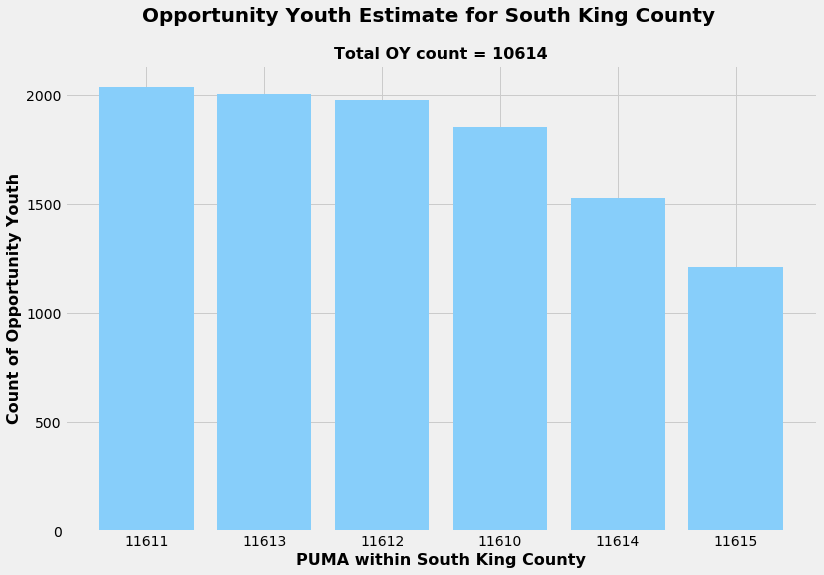

In [25]:
x = oy_count_with_esr_wkl_south['puma']
y = oy_count_with_esr_wkl_south['oy_count']
names = oy_count_with_esr_wkl_south['puma_name']
names = [x.split('--')[1] for x in names]
plt.style.use(['fivethirtyeight'])
fig, ax = plt.subplots(1, figsize=(12,8))
fig.suptitle("Opportunity Youth Estimate for South King County", fontsize=20, fontweight='bold')
ax.bar(x, y, color='lightskyblue')
ax.set_xlabel('PUMA within South King County', fontsize= 16, fontweight='bold')
ax.set_ylabel("Count of Opportunity Youth", fontsize= 16, fontweight='bold')
ax.set_yticks(range(0, 2001, 500))
ax.set_title("Total OY count = 10614", fontsize=16, fontweight='bold')
plt.savefig('../../Visualizations/oy_south.png', bbox_inches = 'tight');



PUMA 11615 (Maple Valley, Enumclaw area) has fewer OYs when compared to their counter parts in the south King county region.

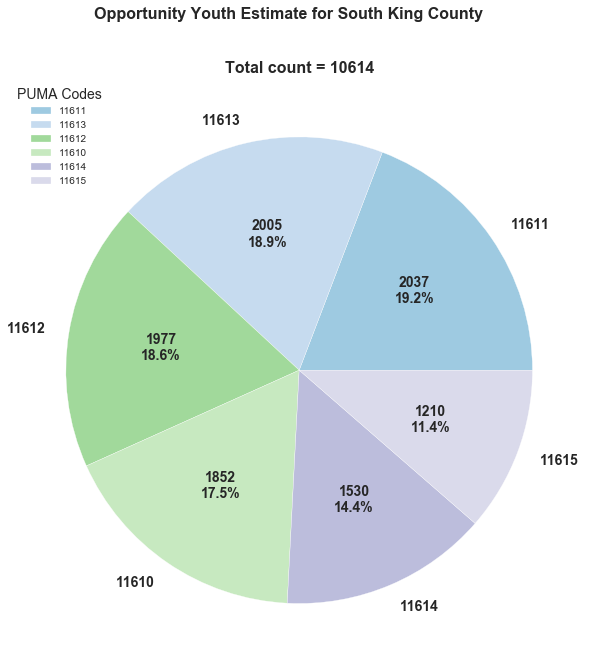

In [26]:
import numpy as np
counts = [int(y[i]) for i in range(len(y))]
plt.style.use(['seaborn'])
fig, ax = plt.subplots(1, figsize=(10,10))
cmap = plt.get_cmap("tab20c")
color = cmap(np.array([2,3,10,11,14,15]))
def value_count(count, counts):
    absolute = int(count/100.*np.sum(counts))
    return "{}\n{:.1f}%".format(absolute, count)
fig.suptitle("Opportunity Youth Estimate for South King County",
             fontsize=16, fontweight='bold')
wedges, texts, autotexts = ax.pie(y, radius=1, labels=x, colors=color, autopct=lambda count: value_count(count, counts), 
       textprops=dict(size=14, weight='bold'), wedgeprops=dict(edgecolor='w'))
ax.set_title("Total count = 10614", fontsize=16, fontweight='bold')
ax.legend(wedges, x, title='PUMA Codes', loc='upper left')
plt.savefig('SouthKingPie_v2.png');



Another look at the OY breakdown between the different PUMAs within South King county, the percentages show that number of OYs are equally distributed between most of the PUMA areas. PUMA 11611, 11613, 11612, 11610 being around 20% each. These are the Burien - Seatac - Tukwila area, Kent city area, Federal Way, Des Moines, Vashon Island area and the Renton city area. 

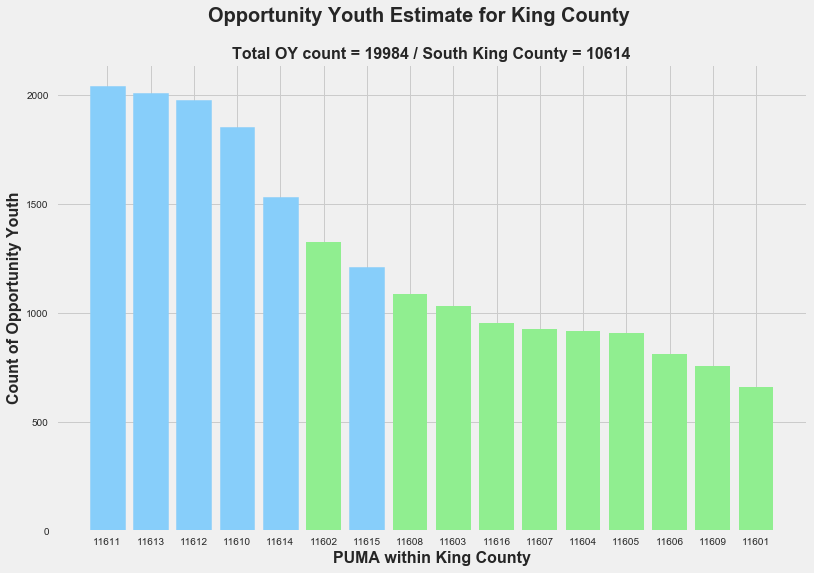

In [27]:
a = oy_count_with_esr_wkl_king['puma']
b = oy_count_with_esr_wkl_king['oy_count']
plt.style.use(['fivethirtyeight'])
fig, ax = plt.subplots(1, figsize=(12,8))
fig.suptitle("Opportunity Youth Estimate for King County", fontsize=20, fontweight='bold')
rect = ax.bar(a, b, color='lightgreen')
ax.set_xlabel('PUMA within King County', fontsize= 16, fontweight='bold')
ax.set_ylabel("Count of Opportunity Youth", fontsize= 16, fontweight='bold')
ax.set_yticks(range(0, 2001, 500))
ax.set_title("Total OY count = 19984 / South King County = 10614", fontsize=16, fontweight='bold')

for x in range(5):
    rect[x].set_color('lightskyblue')
rect[6].set_color('lightskyblue')
plt.savefig('oy_king.png');



PUMAs in South King county have more OYs when compared to the rest of the King county PUMAs

In [28]:
south_oy = pd.read_sql("""SELECT SUM(pwgtp) AS oy_count, puma
                          FROM pums_2017 
                          WHERE puma BETWEEN '11610' AND '11615'
                          AND (esr = '3' OR esr = '6')
                          AND sch = '1'
                          AND agep BETWEEN '16' AND '24'
                          GROUP BY puma
                          ;""", conn)
south_oy_total = south_oy['oy_count'].sum()
south_oy

,oy_count,puma
0,1853.0,11610
1,2038.0,11611
2,1977.0,11612
3,2006.0,11613
4,1530.0,11614
5,1210.0,11615


In [29]:
south_oy_16_18 = pd.read_sql("""SELECT SUM(pwgtp) AS oy_count, puma
                                FROM pums_2017 p
                                WHERE puma BETWEEN '11610' AND '11615'
                                AND (esr = '3' OR esr = '6')
                                AND sch = '1'
                                AND agep BETWEEN '16' AND '18'
                                GROUP BY puma
                                ;""", conn)
south_oy_16_18_count = south_oy_16_18['oy_count'].sum()
south_oy_16_18

,oy_count,puma
0,339.0,11610
1,246.0,11611
2,385.0,11612
3,271.0,11613
4,498.0,11614
5,76.0,11615


In [30]:
south_oy_19_21 = pd.read_sql("""SELECT SUM(pwgtp) AS oy_count, puma
                                FROM pums_2017 
                                WHERE puma BETWEEN '11610' AND '11615'
                                AND (esr = '3' OR esr = '6')
                                AND sch = '1'
                                AND agep BETWEEN '19' AND '21'
                                GROUP BY puma
                                ;""", conn)
south_oy_19_21_count = south_oy_19_21['oy_count'].sum()
south_oy_19_21

,oy_count,puma
0,615.0,11610
1,746.0,11611
2,590.0,11612
3,813.0,11613
4,458.0,11614
5,680.0,11615


In [31]:
south_oy_22_24 = pd.read_sql("""SELECT SUM(pwgtp) AS oy_count, puma
                                FROM pums_2017 
                                WHERE puma BETWEEN '11610' AND '11615'
                                AND (esr = '3' OR esr = '6')
                                AND sch = '1'
                                AND agep BETWEEN '22' AND '24'
                                GROUP BY puma
                                ;""", conn)
south_oy_22_24_count = south_oy_22_24['oy_count'].sum()
south_oy_22_24

,oy_count,puma
0,899.0,11610
1,1046.0,11611
2,1002.0,11612
3,922.0,11613
4,574.0,11614
5,454.0,11615


analysing oy count with regards to their ages


In [32]:
south_oy['total_oy'] = south_oy['oy_count']
south_oy.drop(['oy_count'], axis=1, inplace=True)

In [33]:
south_oy['oy_16_18'] = south_oy_16_18['oy_count']
south_oy['oy_19_21'] = south_oy_19_21['oy_count']
south_oy['oy_22_24'] = south_oy_22_24['oy_count']
sorted_south_oy = south_oy.sort_values(by='total_oy', ascending=False)
sorted_south_oy.set_index('puma')

,total_oy,oy_16_18,oy_19_21,oy_22_24
puma,,,,
11611,2038.0,246.0,746.0,1046.0
11613,2006.0,271.0,813.0,922.0
11612,1977.0,385.0,590.0,1002.0
11610,1853.0,339.0,615.0,899.0
11614,1530.0,498.0,458.0,574.0
11615,1210.0,76.0,680.0,454.0


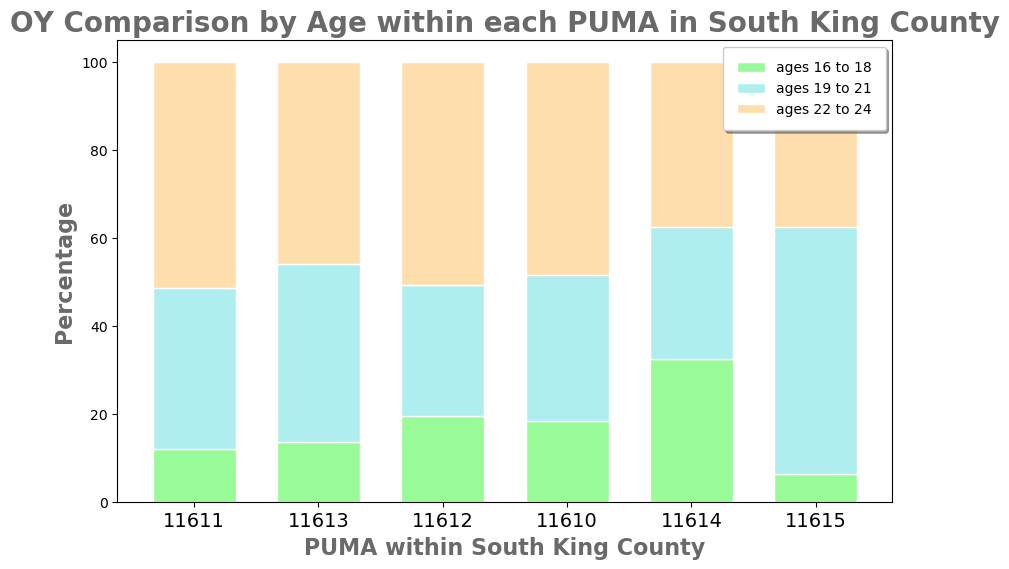

<Figure size 640x480 with 0 Axes>

In [34]:
plt.style.use(['default'])
f,ax = plt.subplots(1, figsize=(10,6))
bar_with = 1
bar_l = [i for i in range(len(sorted_south_oy['total_oy']))]
tick_pos = [i+(bar_with/2) for i in bar_l]
oy_16_percentages = [i/j * 100 for i,j in zip(sorted_south_oy['oy_16_18'], sorted_south_oy['total_oy'])]
oy_19_percentages = [i/j * 100 for i,j in zip(sorted_south_oy['oy_19_21'], sorted_south_oy['total_oy'])]
oy_22_percentages = [i/j * 100 for i,j in zip(sorted_south_oy['oy_22_24'], sorted_south_oy['total_oy'])]
ax.bar(sorted_south_oy['puma'], oy_16_percentages, label='ages 16 to 18', 
       color='palegreen', width=bar_with/1.5, edgecolor='white')
ax.bar(sorted_south_oy['puma'], oy_19_percentages, bottom=oy_16_percentages, label='ages 19 to 21',
       color='paleturquoise', width=bar_with/1.5, edgecolor='white')
ax.bar(sorted_south_oy['puma'], oy_22_percentages, bottom=[i+j for i,j in zip(oy_16_percentages, oy_19_percentages)], 
       label='ages 22 to 24',
       color='navajowhite', width=bar_with/1.5, edgecolor='white')
ax.set_xticklabels(sorted_south_oy['puma'], fontsize=14)
ax.set_ylabel('Percentage', fontsize= 16, fontweight='bold', color='dimgrey')
ax.set_xlabel("PUMA within South King County", fontsize= 16, fontweight='bold', color='dimgrey')
ax.set_title("OY Comparison by Age within each PUMA in South King County",
             fontsize=20, fontweight='bold', color='dimgrey')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()
plt.savefig('../../visualizations/oy_age1.png')



PUMA 11614, Auburn city area have more younger OYs when compared to the rest of the PUMAs within South King county.

In [35]:
report_2016 = pd.DataFrame({'16 to 18': [1610, 985, 179, 31, 2805], 
                            '19 to 21': [2048, 3349, 1666, 221, 7284],
                            '22 to 24': [1981, 3067, 1763, 1917, 8728],
                            'total': [5639, 7401, 3608, 2169, 18817]}, 
                            index = ['No Diploma', 'HS Diploma or GED',
                            'Some College No Degree', 
                            'Associate or Higher Degree', 'OY'])

report_2016

,16 to 18,19 to 21,22 to 24,total
No Diploma,1610,2048,1981,5639
HS Diploma or GED,985,3349,3067,7401
Some College No Degree,179,1666,1763,3608
Associate or Higher Degree,31,221,1917,2169
OY,2805,7284,8728,18817


In [36]:
report_current = pd.DataFrame({'16 to 18': [916, 781, 118, 0, 1815 ], 
                               '19 to 21': [1112, 2176, 521, 93, 3902 ],
                               '22 to 24': [1349, 2135, 1000, 413, 4897],
                               'total': [3377, 5092, 1639, 506, 10614]}, 
                               index = ['No Diploma', 'HS Diploma or GED',
                               'Some College No Degree', 
                               'Associate or Higher Degree', 'OY'])
report_current

,16 to 18,19 to 21,22 to 24,total
No Diploma,916,1112,1349,3377
HS Diploma or GED,781,2176,2135,5092
Some College No Degree,118,521,1000,1639
Associate or Higher Degree,0,93,413,506
OY,1815,3902,4897,10614


In [37]:
combined = report_2016.join(report_current, rsuffix='_new')
combined.drop('OY', axis=0, inplace=True)

In [38]:
combined

,16 to 18,19 to 21,22 to 24,total,16 to 18_new,19 to 21_new,22 to 24_new,total_new
No Diploma,1610,2048,1981,5639,916,1112,1349,3377
HS Diploma or GED,985,3349,3067,7401,781,2176,2135,5092
Some College No Degree,179,1666,1763,3608,118,521,1000,1639
Associate or Higher Degree,31,221,1917,2169,0,93,413,506


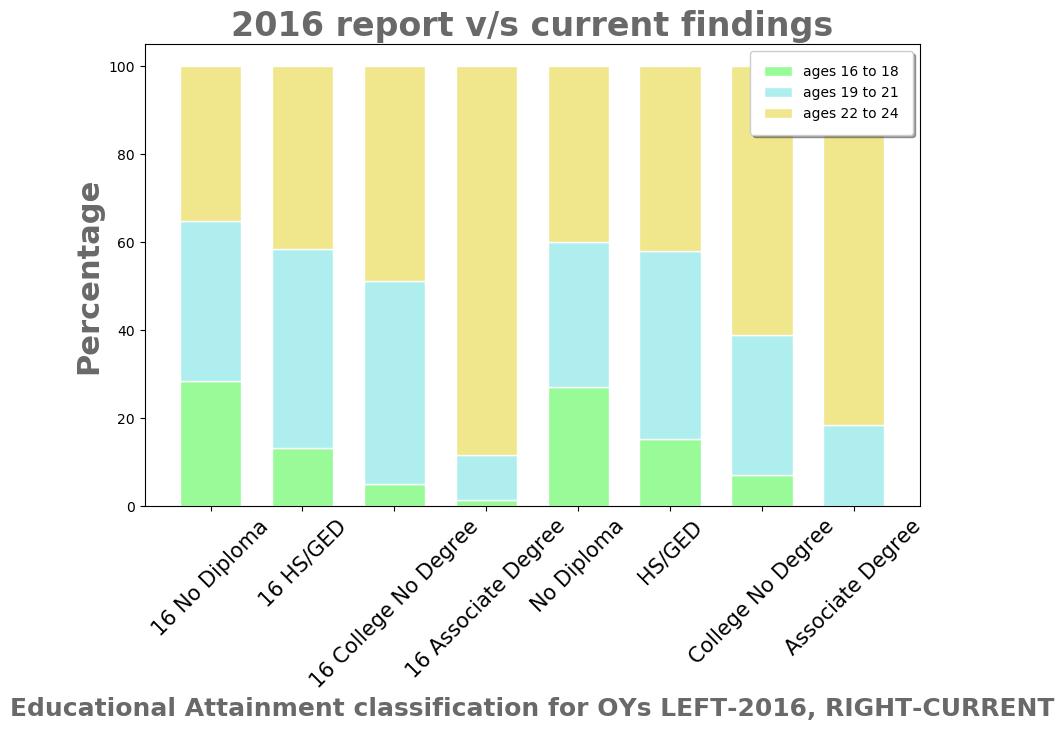

<Figure size 640x480 with 0 Axes>

In [40]:
plt.style.use(['default'])
f,ax = plt.subplots(1, figsize=(10,6))
bar_with = 1
bar_l = [i for i in range(8)]
tick_pos = [i+(bar_with/2) for i in bar_l]
oy_16_pct = [i/j * 100 for i,j in zip(combined['16 to 18'], combined['total'])]
oy_19_pct = [i/j * 100 for i,j in zip(combined['19 to 21'], combined['total'])]
oy_22_pct = [i/j * 100 for i,j in zip(combined['22 to 24'], combined['total'])]
oy_16_pct2 = [i/j * 100 for i,j in zip(combined['16 to 18_new'], combined['total_new'])]
oy_19_pct2 = [i/j * 100 for i,j in zip(combined['19 to 21_new'], combined['total_new'])]
oy_22_pct2 = [i/j * 100 for i,j in zip(combined['22 to 24_new'], combined['total_new'])]
ax.bar(bar_l, oy_16_pct+oy_16_pct2, label='ages 16 to 18', 
       color='palegreen', width=bar_with/1.5, edgecolor='white')
ax.bar(bar_l, oy_19_pct+oy_19_pct2, bottom=oy_16_pct+oy_16_pct2, label='ages 19 to 21',
       color='paleturquoise', width=bar_with/1.5, edgecolor='white')
ax.bar(bar_l, oy_22_pct+oy_22_pct2, bottom=[i+j for i,j in zip(oy_16_pct+oy_16_pct2, oy_19_pct+oy_19_pct2)], 
       label='ages 22 to 24',
       color='khaki', width=bar_with/1.5, edgecolor='white')
ax.set_xticklabels(['No Diploma', '16 No Diploma', '16 HS/GED', '16 College No Degree', '16 Associate Degree', 'No Diploma', 
                    'HS/GED', 'College No Degree', 'Associate Degree'], rotation=45, fontsize=15)
ax.set_ylabel('Percentage', fontsize= 22, fontweight='bold', color='dimgrey')
ax.set_xlabel("Educational Attainment classification for OYs LEFT-2016, RIGHT-CURRENT", fontsize= 18, fontweight='bold', color='dimgrey')
ax.set_title("2016 report v/s current findings",
             fontsize=24, fontweight='bold', color='dimgrey')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()
plt.savefig('oy_credentials1.png');


Although our numbers were quite different from the 2016 report (mostly because we werent able to ascertain the exact variables and criteria used in the report for their calculations), the percentage comparison betweeen the report and our calculations show that the trend is stil the same with regards to the OYs school credentials and their age groups.